<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Sep/Ejercicio-30-09-23/MCMC-test-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
file = "/content/drive/MyDrive/Machine-Learning-2023/olympic100m_men.txt"
datos = np.loadtxt(file, delimiter=',').T
x = datos[0]
y = datos[1]
sigma = np.std(y)  # Desviación estándar de los errores

# Función para calcular la probabilidad de la distribución normal
def normal_pdf(x, mean, variance):
    return np.exp(-(x - mean)**2 / (2 * variance)) / np.sqrt(2 * np.pi * variance)

# Función para calcular el logaritmo de la verosimilitud
def log_likelihood(theta, x, y, sigma):
    y_pred = theta[0] + theta[1] * x
    error = y - y_pred
    return -0.5 * np.sum(error**2) / (sigma**2)

# Función para el paso de Metropolis-Hastings
def metropolis_step(theta_current, proposal_sigma, x, y, sigma):
    theta_proposed = theta_current + np.random.normal(0, proposal_sigma, size=len(theta_current))

    # Calcular el logaritmo de la verosimilitud para los parámetros propuestos y actuales
    log_likelihood_current = log_likelihood(theta_current, x, y, sigma)
    log_likelihood_proposed = log_likelihood(theta_proposed, x, y, sigma)

    # Calcular la razón de aceptación
    acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)

    # Aceptar o rechazar el nuevo valor de theta
    if np.random.rand() < acceptance_ratio:
        return theta_proposed
    else:
        return theta_current

In [44]:
# Parámetros del MCMC
num_samples = 10000
burn_in = 1000
proposal_sigma = 0.01

# Inicialización de los parámetros
theta_current = np.array([0.0, 0.0])

# Listas para almacenar las muestras
theta_samples = []

# Ejecutar el MCMC
for _ in range(num_samples):
    theta_current = metropolis_step(theta_current, proposal_sigma, x, y, sigma)
    theta_samples.append(theta_current)

# Descartar las muestras de "burn-in"
theta_samples = np.array(theta_samples[burn_in:])

<ipython-input-43-ec1d9506f4dd>:30: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(log_likelihood_proposed - log_likelihood_current)


In [45]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

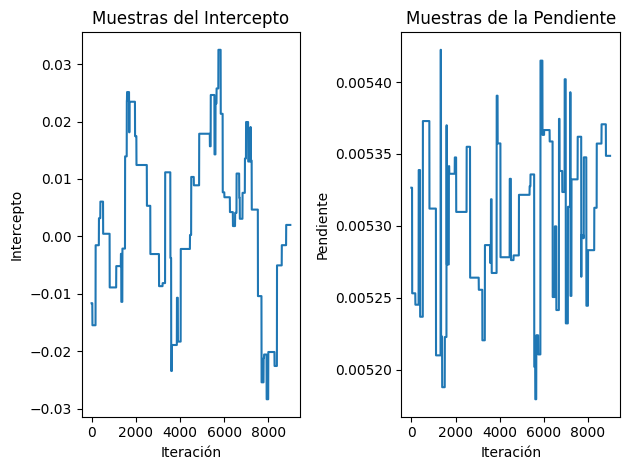

In [46]:
plt.subplot(1, 2, 1)
plt.plot(theta_samples[:, 0])
plt.xlabel('Iteración')
plt.ylabel('Intercepto')
plt.title('Muestras del Intercepto')

plt.subplot(1, 2, 2)
plt.plot(theta_samples[:, 1])
plt.xlabel('Iteración')
plt.ylabel('Pendiente')
plt.title('Muestras de la Pendiente')

plt.tight_layout()
plt.show()

In [47]:
# Estimar los valores finales de los parámetros
theta_mean = np.mean(theta_samples, axis=0)
print("Estimación final del intercepto:", theta_mean[0])
print("Estimación final de la pendiente:", theta_mean[1])

Estimación final del intercepto: 0.0023858882257126466
Estimación final de la pendiente: 0.00530270861779577
